<a href="https://colab.research.google.com/github/srinixm97/MachineLearning/blob/main/7072_Machine_Learning_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from yellowbrick.classifier import ROCAUC
from sklearn import svm

#Reading data into dataframe
d = pd.read_excel("Attribute_dress.xlsx")
d1  = pd.read_excel("Sales_details.xlsx")

#Subtract the columns which are not needed
d = d.drop('Dress_ID',axis = 1)
d1= d1.drop('Dress_ID', axis = 1)

#Checking whether it contains null values
d1.isnull().sum()

29/8/2013                0
31/8/2013                0
2013-02-09 00:00:00      0
2013-04-09 00:00:00      0
2013-06-09 00:00:00      0
2013-08-09 00:00:00      0
2013-10-09 00:00:00      0
2013-12-09 00:00:00      0
14/9/2013                0
16/9/2013                0
18/9/2013                0
20/9/2013                0
22/9/2013                0
24/9/2013                0
26/9/2013              237
28/9/2013                0
30/9/2013              273
2013-02-10 00:00:00    275
2013-04-10 00:00:00    274
2013-06-10 00:00:00      0
2010-08-10 00:00:00    271
2013-10-10 00:00:00    271
2013-12-10 00:00:00      0
dtype: int64

In [2]:

#Replacing null values with '0'
d1=d1.fillna(0)

#Check for null values again
d1.isnull().sum()

29/8/2013              0
31/8/2013              0
2013-02-09 00:00:00    0
2013-04-09 00:00:00    0
2013-06-09 00:00:00    0
2013-08-09 00:00:00    0
2013-10-09 00:00:00    0
2013-12-09 00:00:00    0
14/9/2013              0
16/9/2013              0
18/9/2013              0
20/9/2013              0
22/9/2013              0
24/9/2013              0
26/9/2013              0
28/9/2013              0
30/9/2013              0
2013-02-10 00:00:00    0
2013-04-10 00:00:00    0
2013-06-10 00:00:00    0
2010-08-10 00:00:00    0
2013-10-10 00:00:00    0
2013-12-10 00:00:00    0
dtype: int64

In [3]:
#Attributes dataset information
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Style           500 non-null    object 
 1   Price           498 non-null    object 
 2   Rating          500 non-null    float64
 3   Size            500 non-null    object 
 4   Season          498 non-null    object 
 5   NeckLine        497 non-null    object 
 6   SleeveLength    498 non-null    object 
 7   waiseline       413 non-null    object 
 8   Material        372 non-null    object 
 9   FabricType      234 non-null    object 
 10  Decoration      264 non-null    object 
 11  Pattern Type    391 non-null    object 
 12  Recommendation  500 non-null    int64  
dtypes: float64(1), int64(1), object(11)
memory usage: 50.9+ KB


In [4]:
#Sales dataset information
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   29/8/2013            500 non-null    int64  
 1   31/8/2013            500 non-null    int64  
 2   2013-02-09 00:00:00  500 non-null    int64  
 3   2013-04-09 00:00:00  500 non-null    int64  
 4   2013-06-09 00:00:00  500 non-null    int64  
 5   2013-08-09 00:00:00  500 non-null    int64  
 6   2013-10-09 00:00:00  500 non-null    int64  
 7   2013-12-09 00:00:00  500 non-null    object 
 8   14/9/2013            500 non-null    object 
 9   16/9/2013            500 non-null    object 
 10  18/9/2013            500 non-null    object 
 11  20/9/2013            500 non-null    object 
 12  22/9/2013            500 non-null    object 
 13  24/9/2013            500 non-null    int64  
 14  26/9/2013            500 non-null    float64
 15  28/9/2013            500 non-null    int

In [5]:
#Replacing 'Orders','removed' & 'Removed' as 0 in Sales dataset
d1 = d1.replace("Orders", 0)
d1 = d1.replace("removed", 0)
d1 = d1.replace("Removed", 0)

d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   29/8/2013            500 non-null    int64  
 1   31/8/2013            500 non-null    int64  
 2   2013-02-09 00:00:00  500 non-null    int64  
 3   2013-04-09 00:00:00  500 non-null    int64  
 4   2013-06-09 00:00:00  500 non-null    int64  
 5   2013-08-09 00:00:00  500 non-null    int64  
 6   2013-10-09 00:00:00  500 non-null    int64  
 7   2013-12-09 00:00:00  500 non-null    int64  
 8   14/9/2013            500 non-null    int64  
 9   16/9/2013            500 non-null    int64  
 10  18/9/2013            500 non-null    int64  
 11  20/9/2013            500 non-null    int64  
 12  22/9/2013            500 non-null    int64  
 13  24/9/2013            500 non-null    int64  
 14  26/9/2013            500 non-null    float64
 15  28/9/2013            500 non-null    int

In [6]:
#Identify the sales
d1 = d1.astype(str)
d1 = d1.astype(float)
d1['sales_sum'] = d1.sum(axis=1,numeric_only=True,skipna=True)
#Adding all the columns to d1
d['sales_sum'] = d1['sales_sum']

d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Style           500 non-null    object 
 1   Price           498 non-null    object 
 2   Rating          500 non-null    float64
 3   Size            500 non-null    object 
 4   Season          498 non-null    object 
 5   NeckLine        497 non-null    object 
 6   SleeveLength    498 non-null    object 
 7   waiseline       413 non-null    object 
 8   Material        372 non-null    object 
 9   FabricType      234 non-null    object 
 10  Decoration      264 non-null    object 
 11  Pattern Type    391 non-null    object 
 12  Recommendation  500 non-null    int64  
 13  sales_sum       500 non-null    float64
dtypes: float64(2), int64(1), object(11)
memory usage: 54.8+ KB


In [7]:
#Prepare categorical columns list(catg_col)
catg_col = ['Style','Price','Size','Season','NeckLine','SleeveLength','waiseline','Material','FabricType','Decoration','Pattern Type']


In [8]:
#Encoding using OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(d[catg_col])
e_cols = encoder.transform(d[catg_col])

#Adding encoded columns to d
ed = pd.concat([d, pd.DataFrame(e_cols.toarray())], axis=1)

ed

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,...,154,155,156,157,158,159,160,161,162,163
0,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Casual,Low,4.7,M,Spring,o-neck,full,natural,polyster,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
496,Sexy,Low,4.3,free,Summer,o-neck,full,empire,cotton,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
497,Casual,Average,4.7,M,Summer,v-neck,full,empire,cotton,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
498,Casual,Average,4.6,L,winter,boat-neck,sleevless,empire,silk,broadcloth,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
#Removing real categorical columns
ed = ed.drop(catg_col, axis = 1)
ed.columns  = ed.columns.astype(str)

ed


,Rating,Recommendation,sales_sum,0,1,2,3,4,5,6,...,154,155,156,157,158,159,160,161,162,163
0,4.6,1,75979.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0,52256.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0,223.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4.6,1,39691.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4.5,0,44077.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,4.7,1,8915.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
496,4.3,0,17508.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
497,4.7,1,12606.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
498,4.6,1,5167.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
#Splitting data for test and training
X = ed.drop('Recommendation', axis=1).values
Y = ed['Recommendation'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.25, random_state=42)

**LOGISTIC REGRESSION**

In [17]:
#Model Initialization
MLR = LogisticRegression(max_iter = 10000)
#Training data for model fitting
MLR.fit(X_train, Y_train)
#Prediction of test data
Y_PLR = MLR.predict(X_test)

**Find best Parameters using Grid Search**

In [21]:
param_grid = { 'C': [0.1, 1.0, 10.0],
               'penalty': ['l1', 'l2'],
               'random_state': [42]
              }

grid_search = GridSearchCV(MLR, param_grid, cv=5, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, Y_train)


#Printing best params and scores

print("Best parameters : ", grid_search.best_params_)
print("Best score : ", grid_search.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters :  {'C': 0.1, 'penalty': 'l2', 'random_state': 42}
Best score :  0.6213333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

**ACCURACY SCORE**

In [22]:
#Accuracy score for the model
AccuracyValue ={}
Accuracy_Value = accuracy_score(Y_test, Y_PLR)*100
print("Accuracy Score: {:.2f}%".format(Accuracy_Value))
Log_Reg = {'Log_Reg':Accuracy_Value}
AccuracyValue.update(Log_Reg)

Accuracy Score: 58.40%


**CROSS VALIDATION 10-FOLD**

In [23]:
k_fold= KFold(n_splits=5, shuffle=True, random_state=5)
kfold_score = cross_val_score(MLR, X, Y, cv=k_fold, scoring ='accuracy').mean()
print("Cross-Validation 10-Fold: ",kfold_score)

Cross-Validation 10-Fold:  0.588


**CLASSIFICATION REPORT**

In [24]:
Class_Report = classification_report(Y_test, Y_PLR)
print(Class_Report)

              precision    recall  f1-score   support

           0       0.59      0.99      0.73        73
           1       0.50      0.02      0.04        52

    accuracy                           0.58       125
   macro avg       0.54      0.50      0.39       125
weighted avg       0.55      0.58      0.44       125



**CONFUSION MATRIX**

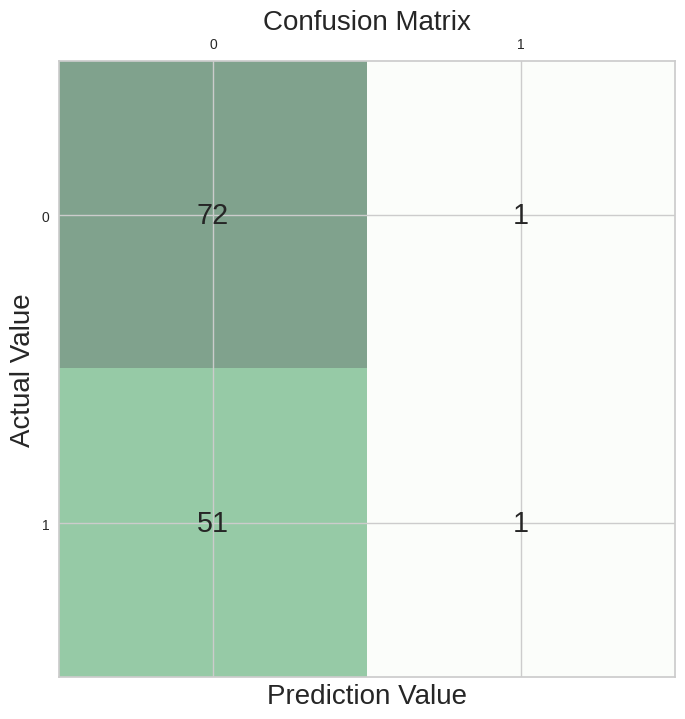

In [25]:
ConfusionMatrix = confusion_matrix(y_true= Y_test, y_pred= Y_PLR)
fig, ax = plt.subplots(figsize = (8,8))
ax.matshow(ConfusionMatrix, cmap = plt.cm.Greens, alpha = 0.5)
for i in range(ConfusionMatrix.shape[0]):
  for j in range(ConfusionMatrix.shape[1]):
    ax.text(x=j, y=i, s=ConfusionMatrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Prediction Value', fontsize=20)
plt.ylabel('Actual Value', fontsize=20)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

**VISUALIZATION OF ROC CURVE**

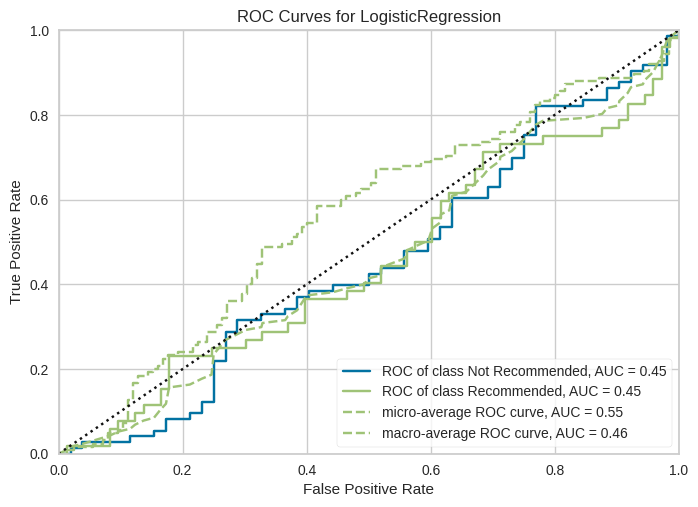

ROC AUC : 0.5028


In [26]:
visualizer = ROCAUC(MLR, classes = ["Not Recommended","Recommended"])
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.show()
ROC_score = roc_auc_score(Y_test, Y_PLR)
print(f"ROC AUC : {ROC_score:.4f}")

**DECISION TREE**

In [33]:
#Model Initialization
dtc = DecisionTreeClassifier()

#Training data to Fit Model
dtc.fit(X_train, Y_train)

#Prediction of test data
Y_PDF = dtc.predict(X_test)

#Printing accuracy score
Accuracy_Value = accuracy_score(Y_test, Y_PDF)
print("Accuracy Score: {:.2f}%".format(Accuracy_Value*100))

Accuracy Score: 54.40%


**Find best Parameters using Grid Search**

In [34]:
param_grid = {'max_depth': [3,4,5,10],
              'min_samples_leaf': [5,10,15],
              'random_state' :range(20)}

grid_search = GridSearchCV(dtc, param_grid, cv=5, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, Y_train)


#Printing best params and scores

print("Best parameters : ", grid_search.best_params_)
print("Best score : ", grid_search.best_score_)


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best parameters :  {'max_depth': 4, 'min_samples_leaf': 5, 'random_state': 13}
Best score :  0.608


In [35]:
best_dtc = grid_search.best_estimator_

**Fitting New classifier to the training data**

In [36]:
best_dtc.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=13)

**Prediction of Test data**

In [37]:
Y_PDF = best_dtc.predict(X_test)

**Printing Accuracy score**

In [38]:
Accuracy_Value = accuracy_score(Y_test, Y_PDF)*100
print("Accuracy Score: {:.2f}%".format(Accuracy_Value))
DecTree = {'Decision_Tree': Accuracy_Value}
AccuracyValue.update(DecTree)

Accuracy Score: 56.80%


**Cross Validation 10-Fold**

In [39]:
k_fold= KFold(n_splits=5, shuffle=True, random_state=5)
kfold_score = cross_val_score(best_d, X, Y, cv=k_fold, scoring ='accuracy').mean()
print("Cross-Validation 10-Fold: ",kfold_score)

Cross-Validation 10-Fold:  0.5740000000000001


**Classification Report**

In [40]:
from sklearn.metrics import classification_report
Class_Report = classification_report(Y_test, Y_PDF)
print(Class_Report)

              precision    recall  f1-score   support

           0       0.61      0.71      0.66        73
           1       0.47      0.37      0.41        52

    accuracy                           0.57       125
   macro avg       0.54      0.54      0.54       125
weighted avg       0.55      0.57      0.56       125



**Confusion Matrix**

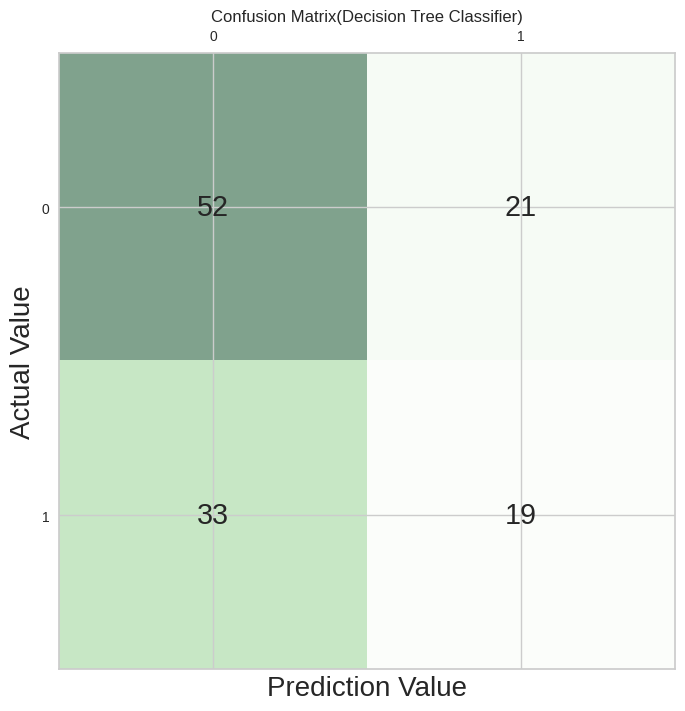

In [41]:
ConfusionMatrix = confusion_matrix(y_true= Y_test, y_pred= Y_PDF)
fig, ax = plt.subplots(figsize = (8,8))
ax.matshow(ConfusionMatrix, cmap = plt.cm.Greens, alpha = 0.5)
for i in range(ConfusionMatrix.shape[0]):
  for j in range(ConfusionMatrix.shape[1]):
    ax.text(x=j, y=i, s=ConfusionMatrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Prediction Value', fontsize=20)
plt.ylabel('Actual Value', fontsize=20)
plt.title('Confusion Matrix(Decision Tree Classifier)')
plt.show()



**Visualization of ROC curve(Decision Tree Classifier)**

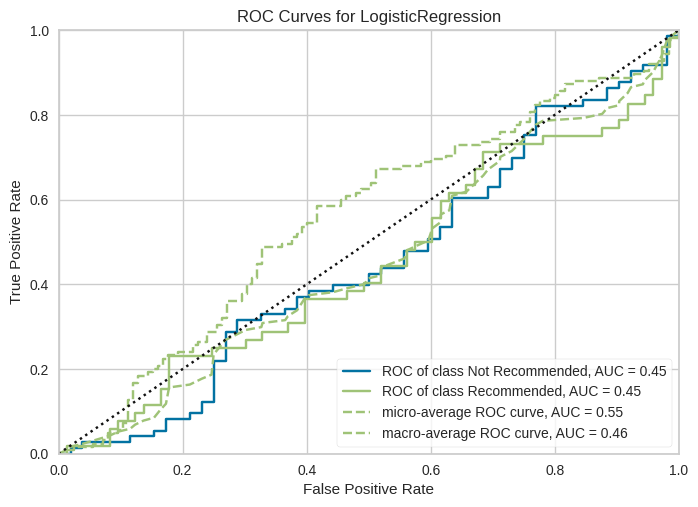

ROC AUC : 0.5389


In [42]:
visualizer = ROCAUC(Model, classes = ["Not Recommended","Recommended"])
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.show()
ROC_score = roc_auc_score(Y_test, Y_PDF)
print(f"ROC AUC : {ROC_score:.4f}")

**Random Forest Classifier**

In [43]:
#Model Initialization
RFC = RandomForestClassifier()

#Training data to Fit Model
RFC.fit(X_train, Y_train)

#Prediction of test data
Y_PRF = RFC.predict(X_test)

#Printing accuracy score
Accuracy_Value = accuracy_score(Y_test, Y_PRF)
print("Accuracy Score: {:.2f}%".format(Accuracy_Value*100))

Accuracy Score: 60.00%


**Find best Parameters using Grid Search(RandomForestClassifier)**

In [44]:
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [5,10,15,20],
              'min_samples_leaf': [1,2,4,6,8],
              }

grid_search = GridSearchCV(RFC, param_grid, cv=5, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, Y_train)


#Printing best params and scores

print("Best parameters : ", grid_search.best_params_)
print("Best score : ", grid_search.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters :  {'max_depth': 20, 'min_samples_leaf': 4, 'n_estimators': 200}
Best score :  0.64


**Creation of new random forest classifier**

In [45]:
best_rfc = grid_search.best_estimator_

**Fitting New classifier to the training data**

In [46]:
best_rfc.fit(X_train, Y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, n_estimators=200)

**Prediction of Test data**

In [47]:
Y_PRF = best_rfc.predict(X_test)

**Printing Accuracty score**

In [48]:
Accuracy_Value = accuracy_score(Y_test, Y_PRF)*100
print("Accuracy Score: {:.2f}%".format(Accuracy_Value))
RdmFor = {'Random Forest ': Accuracy_Value}
AccuracyValue.update(RdmFor)


Accuracy Score: 60.00%


**Cross Validation 10-Fold**

In [49]:
k_fold= KFold(n_splits=5, shuffle=True, random_state=5)
kfold_score = cross_val_score(best_rfc, X, Y, cv=k_fold, scoring ='accuracy').mean()
print("Cross-Validation 10-Fold: ",kfold_score)

Cross-Validation 10-Fold:  0.6260000000000001


**Classification Report**

In [50]:
from sklearn.metrics import classification_report
Class_Report = classification_report(Y_test, Y_PRF)
print(Class_Report)

              precision    recall  f1-score   support

           0       0.61      0.85      0.71        73
           1       0.54      0.25      0.34        52

    accuracy                           0.60       125
   macro avg       0.58      0.55      0.53       125
weighted avg       0.58      0.60      0.56       125



**Confusion Matrix(Random Forest Classifier)**

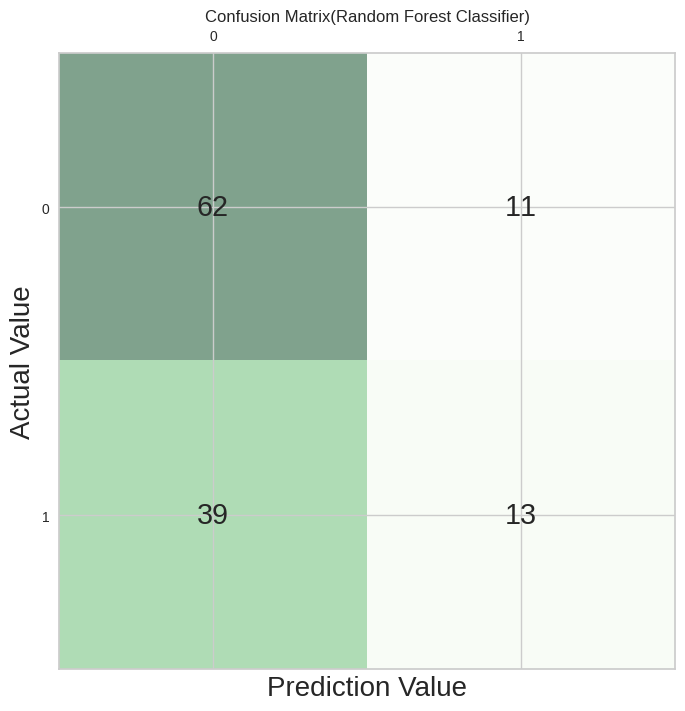

In [53]:
ConfusionMatrix = confusion_matrix(y_true= Y_test, y_pred= Y_PRF)
fig, ax = plt.subplots(figsize = (8,8))
ax.matshow(ConfusionMatrix, cmap = plt.cm.Greens, alpha = 0.5)
for i in range(ConfusionMatrix.shape[0]):
  for j in range(ConfusionMatrix.shape[1]):
    ax.text(x=j, y=i, s=ConfusionMatrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Prediction Value', fontsize=20)
plt.ylabel('Actual Value', fontsize=20)
plt.title('Confusion Matrix(Random Forest Classifier)')
plt.show()

**Visualization of ROC Curve(Random Forest Classifier)**

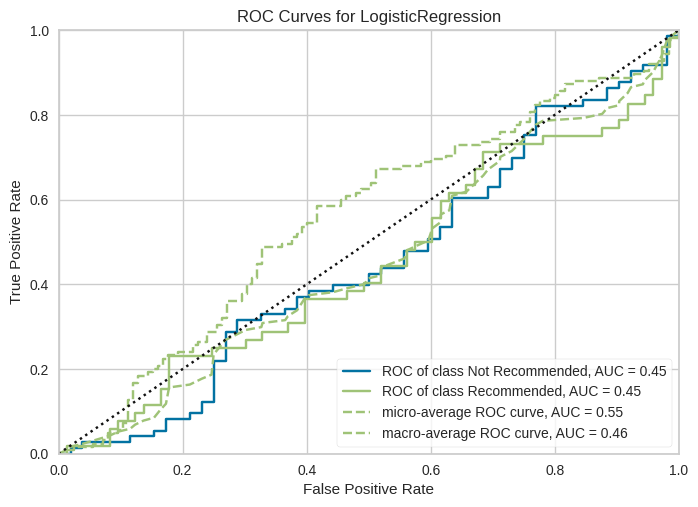

ROC AUC : 0.5497


In [54]:
visualizer = ROCAUC(Model, classes = ["Not Recommended","Recommended"])
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.show()
ROC_score = roc_auc_score(Y_test, Y_PRF)
print(f"ROC AUC : {ROC_score:.4f}")

**K Nearest Neighbour**

In [55]:
#Model Initialization
KNN = KNeighborsClassifier()

#Training data to Fit Model
KNN.fit(X_train, Y_train)

#Prediction of test data
Y_PKN = KNN.predict(X_test)

#Printing accuracy score
Accuracy_Value = accuracy_score(Y_test, Y_PKN)
print("Accuracy Score: {:.2f}%".format(Accuracy_Value*100))

Accuracy Score: 58.40%


**Find best parameters for Grid Search(KNN)**

In [56]:
param_grid = {'n_neighbors':[3, 5, 7, 9, 11],
              'weights' : ['uniform','distance'],
              'metric':['minkowski']}
grid_search = GridSearchCV(KNN, param_grid, cv = 5, n_jobs = -1,verbose = 2)
grid_search.fit(X_train, Y_train)
print("Best parameters: ", grid_search.best_params_)
print("Best score:",grid_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters:  {'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'uniform'}
Best score: 0.5653333333333334


In [57]:
best_KNN = grid_search.best_estimator_
best_KNN.fit(X_train, Y_train)
Y_PKN = best_KNN.predict(X_test)

**Printing Accuracy Score**

In [58]:
Accuracy_Value = accuracy_score(Y_test, Y_PKN)*100
print("Accuracy Score: {:.2f}%".format(Accuracy_Value))
KNN1 = {'KNN': Accuracy_Value}
AccuracyValue.update(KNN1)

Accuracy Score: 59.20%


**Cross Validation 10 Fold**

In [59]:
k_fold= KFold(n_splits=5, shuffle=True, random_state=5)
kfold_score = cross_val_score(best_KNN, X, Y, cv=k_fold, scoring ='accuracy').mean()
print("Cross-Validation 10-Fold: ",kfold_score)

Cross-Validation 10-Fold:  0.5439999999999999


**Classification Report**

In [60]:
from sklearn.metrics import classification_report
Class_Report = classification_report(Y_test, Y_PKN)
print(Class_Report)

              precision    recall  f1-score   support

           0       0.62      0.77      0.69        73
           1       0.51      0.35      0.41        52

    accuracy                           0.59       125
   macro avg       0.57      0.56      0.55       125
weighted avg       0.58      0.59      0.57       125



**Confusion Matrix**

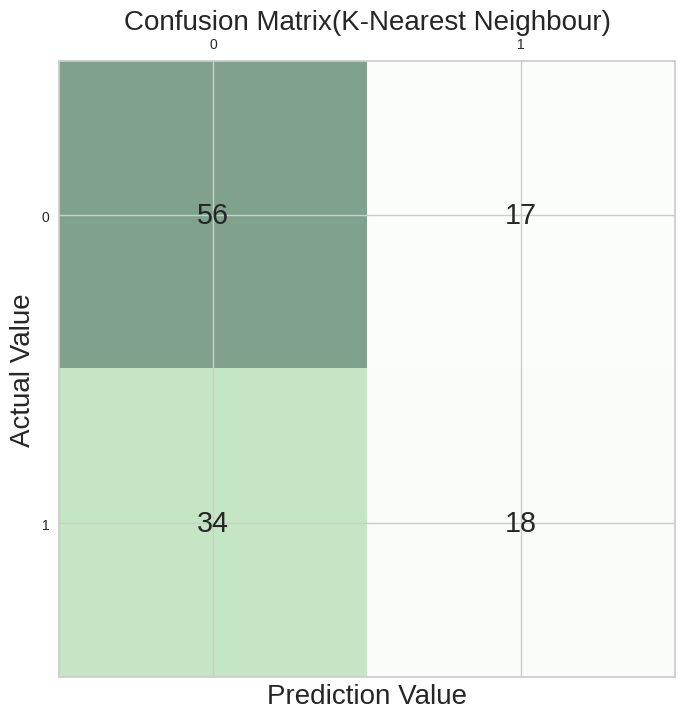

In [61]:
ConfusionMatrix = confusion_matrix(y_true= Y_test, y_pred= Y_PKN)
fig, ax = plt.subplots(figsize = (8,8))
ax.matshow(ConfusionMatrix, cmap = plt.cm.Greens, alpha = 0.5)
for i in range(ConfusionMatrix.shape[0]):
  for j in range(ConfusionMatrix.shape[1]):
    ax.text(x=j, y=i, s=ConfusionMatrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Prediction Value', fontsize=20)
plt.ylabel('Actual Value', fontsize=20)
plt.title('Confusion Matrix(K-Nearest Neighbour)', fontsize = 20)
plt.show()

**ROC Curve**

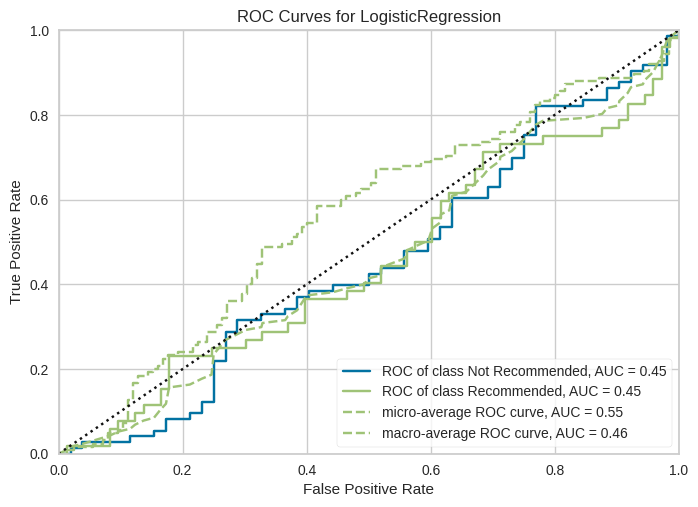

ROC AUC : 0.5566


In [62]:
visualizer = ROCAUC(Model, classes = ["Not Recommended","Recommended"])
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.show()
ROC_score = roc_auc_score(Y_test, Y_PKN)
print(f"ROC AUC : {ROC_score:.4f}")

**Plotting the comparison of classifiers and Accuracy**

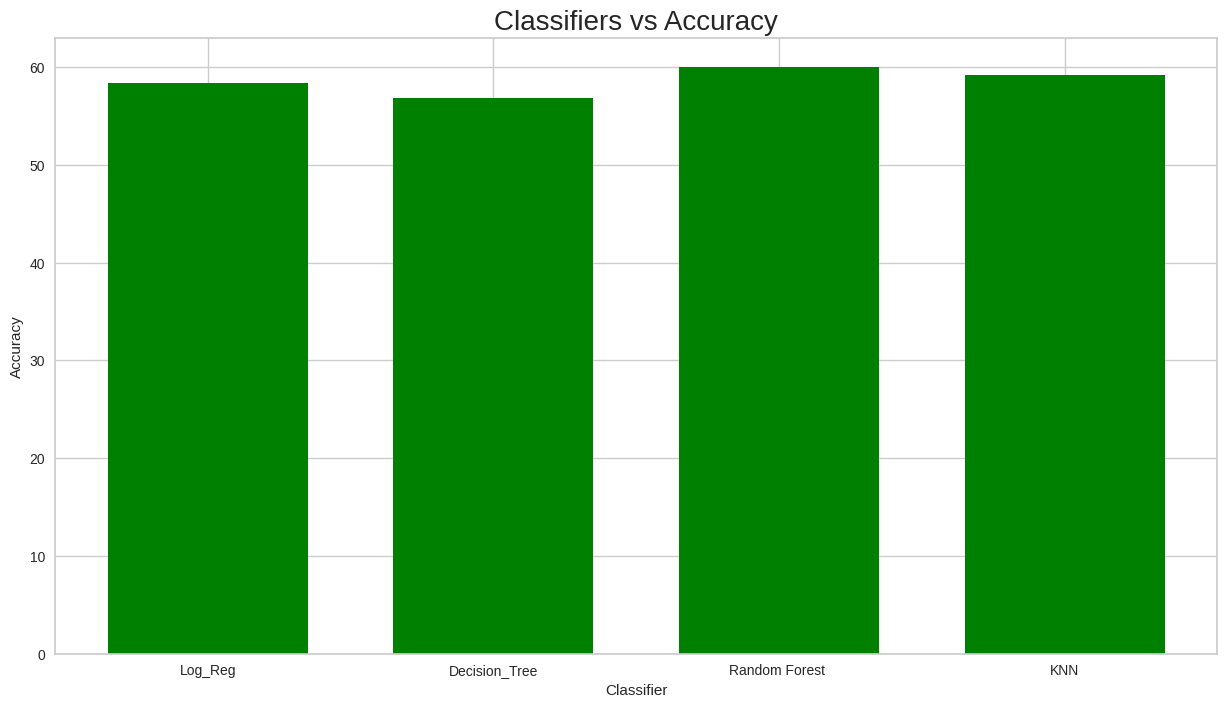

In [63]:
Classifier = list(AccuracyValue.keys())
Accuracy = list(AccuracyValue.values())

fig = plt.figure(figsize = (15, 8))

plt.bar(Classifier, Accuracy, color = 'green', width = 0.7 )
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Classifiers vs Accuracy", fontsize = 20)
plt.show()